# 色彩均衡化

In [8]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [9]:
src = cv2.cvtColor(cv2.imread('../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [16]:
# 对一幅灰度图像进行直方图均衡化
def histeq(im,nbr_bins=256):
    #计算图像的直方图
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() #累计分布函数
    cdf = 255 * cdf / cdf[-1]  #归一化
 
    #使用累计分布函数的线性插值，计算新的像素
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    imhist,bins = histogram(im2.flatten(),nbr_bins,normed=True)
#     return im2.reshape(im.shape),cdf,imhist
    return im2.reshape(im.shape)
def histeq_rgb(src):
    r = src[:,:,0]
    g = src[:,:,1]
    b = src[:,:,2]
    dst = np.zeros_like(src)
    dst[:,:,0] = histeq(r)
    dst[:,:,1] = histeq(g)
    dst[:,:,2] = histeq(b)
    
    return dst

Text(0.5,1,'Color Equation')

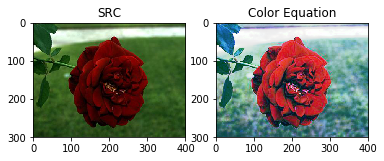

In [17]:
dst = histeq_rgb(src)
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Equation')